# Action2

#### 使用arima

##### 数据加载

In [1]:
import pandas as pd 

##### 将日期数据转换为正确的格式

In [2]:
df = pd.read_csv('user_balance_table.csv', parse_dates=['report_date'])

##### 数据探索

In [3]:
df.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_id              int64         
 1   report_date          datetime64[ns]
 2   tBalance             int64         
 3   yBalance             int64         
 4   total_purchase_amt   int64         
 5   direct_purchase_amt  int64         
 6   purchase_bal_amt     int64         
 7   purchase_bank_amt    int64         
 8   total_redeem_amt     int64         
 9   consume_amt          int64         
 10  transfer_amt         int64         
 11  tftobal_amt          int64         
 12  tftocard_amt         int64         
 13  share_amt            int64         
 14  category1            float64       
 15  category2            float64       
 16  category3            float64       
 17  category4            float64       
dtypes: datetime64[ns](1), float64(4), int64(13)
memory usage: 390.

##### 以时间聚合每天总的购买和赎回值

In [5]:
total_balance = df.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
total_balance

c:\users\guoxi\anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [6]:
purchase_data = total_balance[['total_purchase_amt']] #申购的金额
redeem_data = total_balance[['total_redeem_amt']] #赎回的金额

In [7]:
purchase_data

,total_purchase_amt
report_date,
2013-07-01,32488348
2013-07-02,29037390
2013-07-03,27270770
2013-07-04,18321185
2013-07-05,11648749
...,...
2014-08-27,302194801
2014-08-28,245082751
2014-08-29,267554713


In [8]:
redeem_data

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


##### 拆解数据

In [9]:
import statsmodels.api as sm

In [10]:
import matplotlib.pyplot as plt

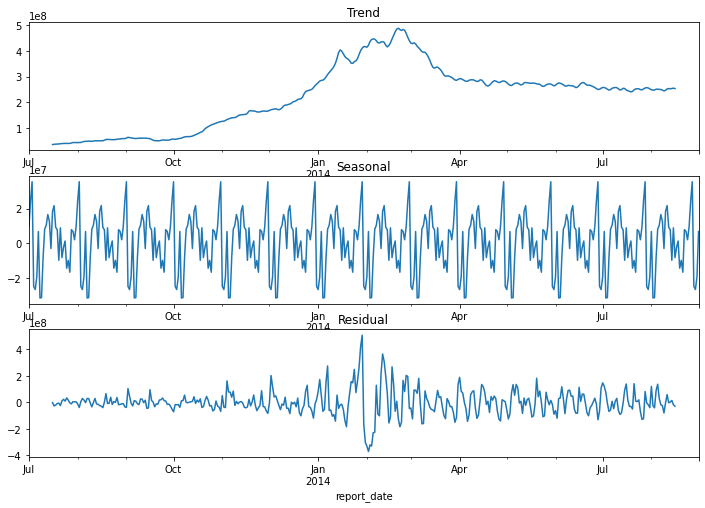

In [11]:
# 指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分： trend(趋势), seasonal(季节), residual(残差)
    result = sm.tsa.seasonal_decompose(data, period=30)
    
    #可视化
    fig = plt.figure(figsize=(12,8))
    axl = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax = axl, title = 'Trend')
    result.seasonal.plot(ax = ax2, title = 'Seasonal')
    result.resid.plot(ax = ax3, title = 'Residual')
plot_stl(purchase_data.total_purchase_amt)

In [16]:
purchase_data2 = purchase_data[(purchase_data.index >= '2014-04-01') & (purchase_data.index <= '2014-04-30')]

([<matplotlib.axis.XTick at 0x1e805c34a48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

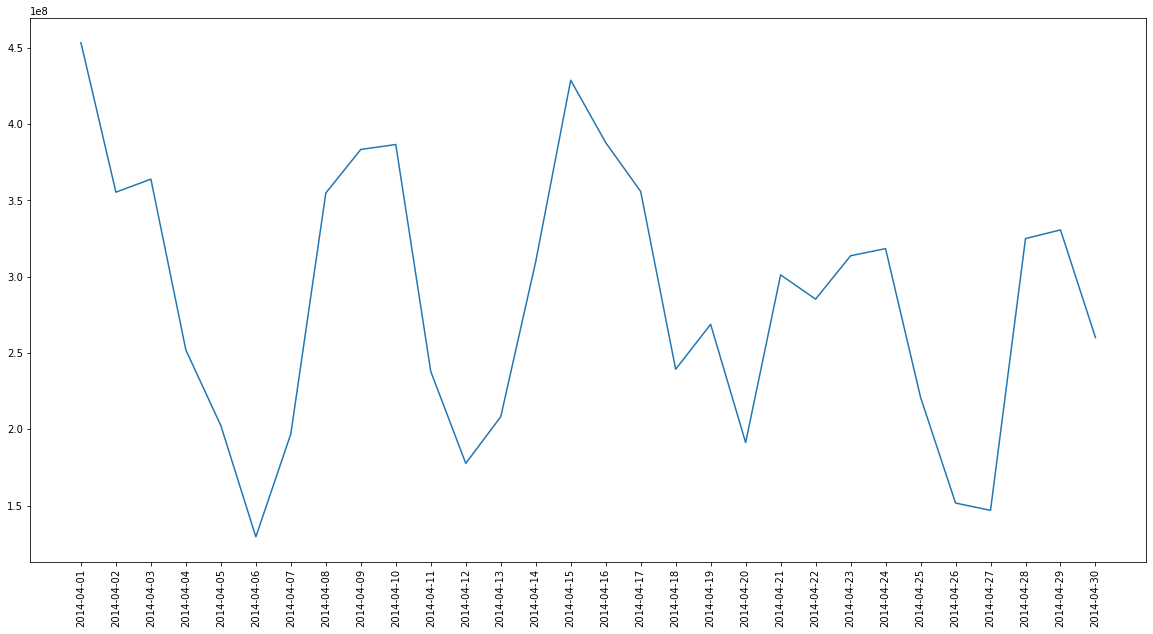

In [17]:
# 画出走势图
plt.figure(figsize=(20,10))
plt.plot(purchase_data2.total_purchase_amt)
date_range = pd.date_range('2014-04-01', '2014-04-30')
plt.xticks(date_range,rotation= 90)

In [18]:
# 看申购数据时间序列的平稳性
from statsmodels.tsa.stattools import adfuller
t = adfuller(purchase_data['total_purchase_amt'])

In [19]:
t #不能拒绝原假设（不平稳）

(-1.5898802926313518,
 0.48867497513759217,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15960.28197033403)

In [22]:
#进行一阶差分,之后重新验证平稳性
diff1 = purchase_data.diff(1)
t = adfuller(diff1[1:])
t

(-7.947102224652353,
 3.1981868624880123e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [23]:
# 看赎回数据时间序列的平稳性
t = adfuller(redeem_data['total_redeem_amt'])
#进行一阶差分,之后重新验证平稳性
diff1 = redeem_data.diff(1)
t = adfuller(diff1[1:]) 
t

(-11.691986906968818,
 1.6443717458499654e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

#### 导入arima模块

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
# p,d,q     d = 1
model = ARIMA(purchase_data, order=(7,1,5)).fit()
purchase_pred = model.predict('2014-09-01','2014-09-30',typ='levels') #使用typ = levels，对原始数据维度上进行预测，相当于进行反差分
purchase_pred

c:\users\guoxi\anaconda3\envs\stan_env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\guoxi\anaconda3\envs\stan_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided,

2014-09-01    3.310531e+08
2014-09-02    3.318776e+08
2014-09-03    3.338916e+08
2014-09-04    2.983201e+08
2014-09-05    2.407519e+08
2014-09-06    2.266129e+08
2014-09-07    2.435555e+08
2014-09-08    2.970859e+08
2014-09-09    3.321280e+08
2014-09-10    3.265212e+08
2014-09-11    2.916845e+08
2014-09-12    2.392710e+08
2014-09-13    2.253540e+08
2014-09-14    2.475282e+08
2014-09-15    2.950934e+08
2014-09-16    3.345012e+08
2014-09-17    3.280835e+08
2014-09-18    2.927106e+08
2014-09-19    2.448972e+08
2014-09-20    2.275704e+08
2014-09-21    2.530218e+08
2014-09-22    2.980719e+08
2014-09-23    3.366751e+08
2014-09-24    3.321964e+08
2014-09-25    2.947117e+08
2014-09-26    2.505384e+08
2014-09-27    2.318263e+08
2014-09-28    2.574457e+08
2014-09-29    3.025700e+08
2014-09-30    3.387025e+08
Freq: D, dtype: float64

In [28]:
#查看模型aic 越小越好
model.aic

16669.646033918565

##### 对赎回进行预测

In [27]:
# p,d,q     d = 1
model2 = ARIMA(redeem_data, order=(7,1,5)).fit()
redeem_pred = model2.predict('2014-09-01','2014-09-30',typ='levels') #使用typ = levels，对原始数据维度上进行预测，相当于进行反差分
redeem_pred

c:\users\guoxi\anaconda3\envs\stan_env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\guoxi\anaconda3\envs\stan_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided,

2014-09-01    3.169331e+08
2014-09-02    3.372233e+08
2014-09-03    3.632409e+08
2014-09-04    3.074405e+08
2014-09-05    2.628134e+08
2014-09-06    2.258331e+08
2014-09-07    2.592049e+08
2014-09-08    3.115266e+08
2014-09-09    3.477178e+08
2014-09-10    3.562321e+08
2014-09-11    3.092338e+08
2014-09-12    2.598427e+08
2014-09-13    2.338783e+08
2014-09-14    2.577977e+08
2014-09-15    3.125283e+08
2014-09-16    3.536947e+08
2014-09-17    3.573463e+08
2014-09-18    3.145865e+08
2014-09-19    2.626403e+08
2014-09-20    2.387173e+08
2014-09-21    2.615920e+08
2014-09-22    3.156952e+08
2014-09-23    3.587845e+08
2014-09-24    3.611334e+08
2014-09-25    3.197668e+08
2014-09-26    2.671800e+08
2014-09-27    2.432594e+08
2014-09-28    2.660913e+08
2014-09-29    3.196887e+08
2014-09-30    3.635234e+08
Freq: D, dtype: float64

In [29]:
model2.aic

16522.035071162463

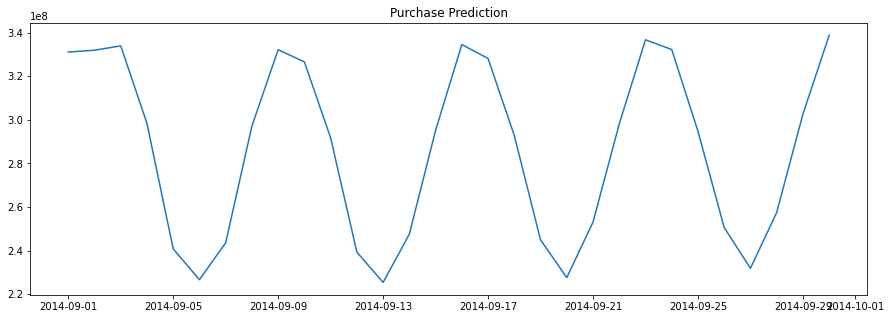

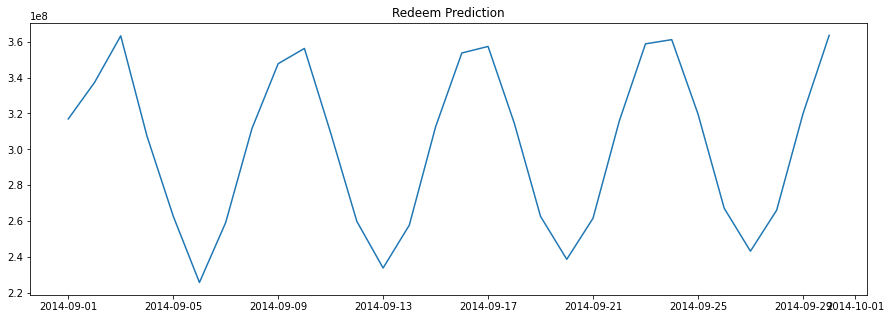

In [30]:
plt.figure(figsize=(15,5))
plt.title("Purchase Prediction")
plt.plot(purchase_pred)
plt.show()

plt.figure(figsize=(15,5))
plt.title("Redeem Prediction")
plt.plot(redeem_pred)
plt.show()

##### 构造结果准备提交

In [31]:
result = pd.DataFrame()

In [32]:
result['date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result

,date,purchase,redeem
0,2014-09-01,3.310531e+08,3.169331e+08
1,2014-09-02,3.318776e+08,3.372233e+08
2,2014-09-03,3.338916e+08,3.632409e+08
3,2014-09-04,2.983201e+08,3.074405e+08
4,2014-09-05,2.407519e+08,2.628134e+08
5,2014-09-06,2.266129e+08,2.258331e+08
6,2014-09-07,2.435555e+08,2.592049e+08
7,2014-09-08,2.970859e+08,3.115266e+08
8,2014-09-09,3.321280e+08,3.477178e+08
9,2014-09-10,3.265212e+08,3.562321e+08


In [33]:
result['date'] = result['date'].apply(lambda x: str(x).replace('-','')[0:8])

In [34]:
result

,date,purchase,redeem
0,20140901,3.310531e+08,3.169331e+08
1,20140902,3.318776e+08,3.372233e+08
2,20140903,3.338916e+08,3.632409e+08
3,20140904,2.983201e+08,3.074405e+08
4,20140905,2.407519e+08,2.628134e+08
5,20140906,2.266129e+08,2.258331e+08
6,20140907,2.435555e+08,2.592049e+08
7,20140908,2.970859e+08,3.115266e+08
8,20140909,3.321280e+08,3.477178e+08
9,20140910,3.265212e+08,3.562321e+08


In [35]:
result.to_csv('arima.csv', header=None, index=False)